# D212 Assessment 2

# 1. Import Packages and Data

In [1]:
# Used to work with dataframes
import pandas as pd

# Used to work with arrays
import numpy as np

# Used for data visualizations
from matplotlib import pyplot as plt
import seaborn as sns

# Used for preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Used to build pipeline with steps to scale and fit models
from sklearn.pipeline import Pipeline

# Principal Component Analysis
from sklearn.decomposition import PCA

In [2]:
# Read in csv file into pandas dataframe "churn_df"
churn_df = pd.read_csv('churn_clean.csv')

In [3]:
# Inspect head of churn data
pd.set_option('display.max_columns',50)
churn_df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


# 2. Pre-processing

In [4]:
# List variables, null counts, and dtypes
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

#### Rename survey columns

In [5]:
# Create dictionary for survey variables that need to be renamed
churn_item_cols = {'Item1': 'Timely_Response',
                         'Item2': 'Timely_Fixes',
                         'Item3': 'Timely_Replacements',
                         'Item4': 'Reliability',
                         'Item5': 'Options',
                         'Item6': 'Respectful_Response',
                         'Item7': 'Courteous_Exchange',
                         'Item8': 'Active_Listening'}

# Rename variables
churn_df.rename(columns=churn_item_cols, inplace=True)

#### Convert categorical (yes/no) fields to binary numeric (1/0)

In [6]:
# Create list of columns to convert
converted_columns = ['Churn', 
                     'Techie', 
                     'Port_modem', 
                     'Tablet', 
                     'Phone', 
                     'Multiple', 
                     'OnlineSecurity', 
                     'OnlineBackup', 
                     'DeviceProtection', 
                     'TechSupport',
                     'StreamingTV', 
                     'StreamingMovies', 
                     'PaperlessBilling']

labelEncoder = LabelEncoder()

# Run for loop iterating through columns to convert, pass dictionary through map function to convert yes/no to 1/0
for i in converted_columns:
    churn_df[i] = labelEncoder.fit_transform(churn_df[i])

#### Convert categorical data to numeric with dummy variables

In [7]:
# Use pandas get dummies for categorical fields "Area", "Marital", "Gender", "Contract"
categorical_conversions = ['Area', 'Marital', 'Contract']
dummy_variables = ['Area_Rural', 'Area_Suburban',
                    'Area_Urban', 'Marital_Divorced', 'Marital_Married', 'Marital_Never Married',
                    'Marital_Separated', 'Marital_Widowed',
                    'Contract_Month-to-month', 'Contract_One year', 'Contract_Two Year']

churn_df = pd.get_dummies(churn_df, columns=categorical_conversions)

In [8]:
# Define numeric features to be used in analysis
features = ['Population', 'Children', 'Age', 'Income', 'Churn', 'Outage_sec_perweek', 
            'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Port_modem', 'Tablet',
            'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Tenure',
            'MonthlyCharge', 'Bandwidth_GB_Year', 'Timely_Response', 'Timely_Fixes',
            'Timely_Replacements', 'Reliability', 'Options', 'Respectful_Response',
            'Courteous_Exchange', 'Active_Listening', 'Area_Rural', 'Area_Suburban',
            'Area_Urban', 'Marital_Divorced', 'Marital_Married', 'Marital_Never Married',
            'Marital_Separated', 'Marital_Widowed','Contract_Month-to-month', 'Contract_One year', 
            'Contract_Two Year']
# Create dataframe with only numeric variables
churn_numeric = churn_df[features]

In [9]:
cont_var = ['Population','Children','Age','Income','Outage_sec_perweek','Email','Contacts','Yearly_equip_failure','Tenure','MonthlyCharge','Bandwidth_GB_Year']
churn_cont = churn_df[cont_var]

In [10]:
churn_cont.head()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,38,0,68,28561.99,7.978323,10,0,1,6.795513,172.455519,904.536110
1,10446,1,27,21704.77,11.699080,12,0,1,1.156681,242.632554,800.982766
2,3735,4,50,9609.57,10.752800,9,0,1,15.754144,159.947583,2054.706961
3,13863,1,48,18925.23,14.913540,15,2,0,17.087227,119.956840,2164.579412
4,11352,0,83,40074.19,8.147417,16,2,1,1.670972,149.948316,271.493436


# 3. Exploratory Data Analysis

#### Display summary statistics

In [11]:
churn_cont.describe()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550
std,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852
min,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715
25%,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827
50%,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903
75%,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370
max,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530


#### Visualize boxplots of continuous variables to investigate distribution of data and potential outliers

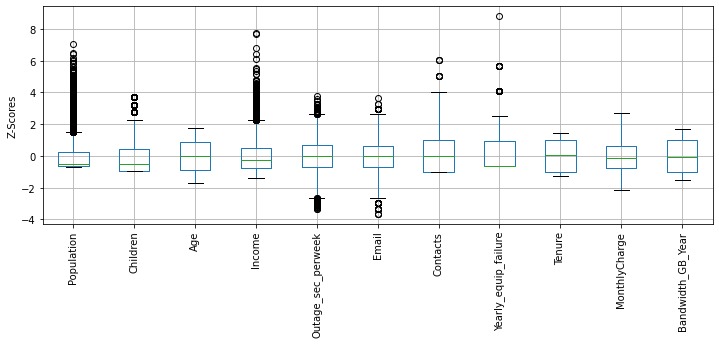

In [12]:
churn_cont_std = (churn_cont - churn_cont.mean())/churn_cont.std()

# Enlarge plot to fit all boxplots
fig, ax = plt.subplots(figsize=[12,4])

# Create boxplot of each variable
churn_cont_std.boxplot()
# Rotate x labels
plt.xticks(rotation=90)
# Title y axis
plt.ylabel('Z-Scores')
plt.show()

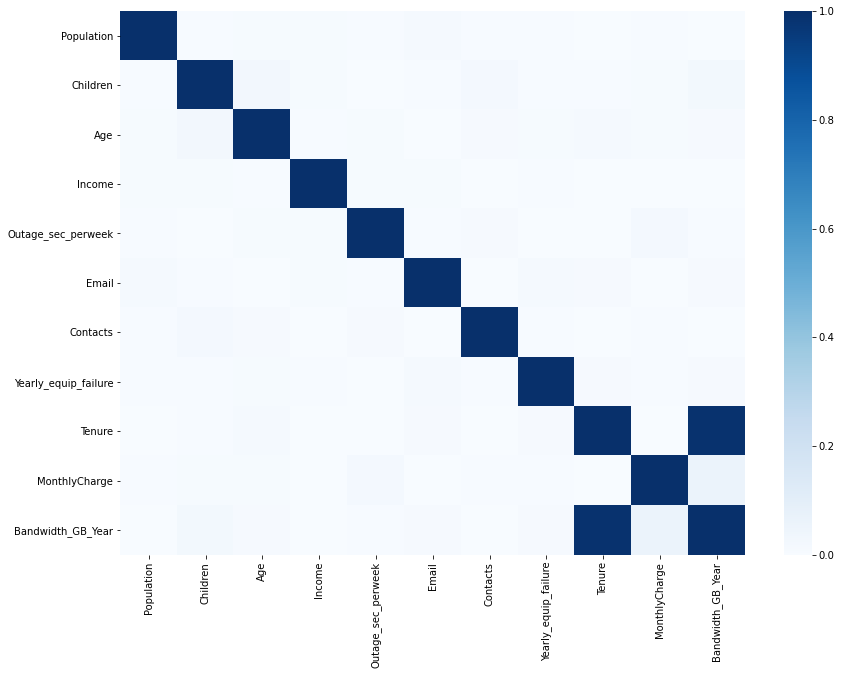

In [13]:
corr_matrix = churn_cont.corr().abs()

fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap(corr_matrix, cmap='Blues', vmin=0, vmax=1)
plt.show()

In [14]:
# Standardize the continuous variable for assessment submission
churn_cont_cols = churn_cont.columns

# Create scaler, fit and transform the data
scaler = StandardScaler()

# Scale continuous variables of churn data
churn_cont_array = scaler.fit_transform(churn_cont)

# Create dataframe from array of scaled continuous churn variables and column headers
churn_cont_df = pd.DataFrame(churn_cont_array, columns=churn_cont_cols)

In [15]:
# Export standardized continuous variables
churn_cont_df.to_csv('Standardized_Continuous_Churn_Assement_Submission.csv', index=False)

# 4. Initial Principle Component Analysis

In [16]:
# Create PCA
pca = PCA()

# Establish random state seed for reproducability
SEED = 13

# Create pipeline
pipeline = Pipeline([('scaler', scaler), ('reducer', pca)])
# Fit pipeline to training data
pipeline.fit(churn_cont)

Pipeline(steps=[('scaler', StandardScaler()), ('reducer', PCA())])

#### Principle Component Matrix

In [17]:
# Create dataframe that displays principle components and their scores for each attribute
pca_df = pd.DataFrame(pipeline.steps[1][1].components_.T,
                       columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11'],
                       index=churn_cont.columns)
# Display pca dataframe
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Population,-0.006007,-0.275637,0.267636,0.422474,0.394930,0.243871,0.175784,0.614035,0.138379,0.177040,-0.000347
Children,0.014172,0.517059,0.343248,-0.076204,0.164533,0.164376,0.180459,-0.184798,0.672256,-0.188740,-0.021587
Age,0.001643,-0.457819,-0.418590,0.198972,0.126614,-0.087791,0.343081,-0.203859,0.273259,-0.563400,0.022369
Income,0.004414,0.254938,-0.268952,-0.077133,-0.318506,0.641985,0.484459,0.182477,-0.254842,-0.100837,-0.000938
Outage_sec_perweek,0.005850,-0.212600,0.336483,-0.587558,0.345667,0.197563,-0.116979,0.098387,-0.285041,-0.482900,0.000283
Email,-0.020887,-0.195432,0.526029,0.311468,-0.045059,0.135906,0.308044,-0.597955,-0.325796,0.092556,0.000252
Contacts,0.004148,-0.427624,-0.107344,-0.162242,-0.123928,0.587837,-0.376069,-0.245083,0.366164,0.287739,-0.000941
Yearly_equip_failure,0.017593,0.169549,-0.385120,-0.135015,0.729850,0.071878,0.158048,-0.277655,-0.159744,0.372774,-0.000097
Tenure,0.705405,-0.006554,-0.007865,0.048500,0.000291,0.009174,-0.030141,-0.007482,-0.027041,-0.027774,-0.705263
MonthlyCharge,0.040448,-0.294988,0.112548,-0.530093,-0.172686,-0.292148,0.555192,0.097520,0.203935,0.375603,-0.045756


#### Scree Plot

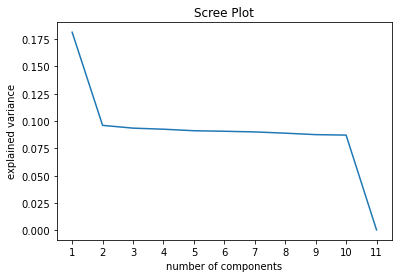

In [18]:
# Iterate through the length of the explained variance ratios in the PCA step of the pipeline and append each to list PC label
pc_labels = [str(pc_var+1) for pc_var in range(len(pipeline.steps[1][1].explained_variance_ratio_))]
# Iterate through the explained variance ratios in the PCA step of the pipeline and append each to list pc_values
pc_values = [pc_val for pc_val in pipeline.steps[1][1].explained_variance_ratio_]
# Create dataframe of pc_labels and pc_values
pc_df = pd.DataFrame({'pc_labels': pc_labels, 'pc_values': pc_values})

# Use seaborn lineplot to visualize the explained variance ratio from dataframe pc_df
sns.lineplot(data=pc_df, x=pc_labels, y=pc_values)

# Add title
plt.title('Scree Plot')
# Add x-axis title
plt.xlabel('number of components')
# Add y-axis title
plt.ylabel('explained variance')
# Show plot
plt.show()

#### Principle component explained variance

In [19]:
# Start counter for names of principle components
pc_counter = 1

# Print header
print('Principle Components Explained Variance Ratios\n'+'-'*50+'\n')

# Iterate through cumulative sum of explained variance ratio of PCA
for i in pipeline.steps[1][1].explained_variance_ratio_:
    # Print PC label and variance ratio
    print('PC {}: {:.4f}'.format(pc_counter, i))
    # Add to counter
    pc_counter += 1

Principle Components Explained Variance Ratios
--------------------------------------------------

PC 1: 0.1813
PC 2: 0.0961
PC 3: 0.0936
PC 4: 0.0926
PC 5: 0.0912
PC 6: 0.0907
PC 7: 0.0901
PC 8: 0.0890
PC 9: 0.0876
PC 10: 0.0872
PC 11: 0.0005


#### Principle component cumulative explained variance

In [20]:
# Start counter for names of principle components
pc_counter = 1

# Print header
print('Principle Components Cumulative Explained Variance Ratio\n'+'-'*50+'\n')

# Iterate through cumulative sum of explained variance ratio of PCA
for i in pipeline.steps[1][1].explained_variance_ratio_.cumsum():
    # Print PC label and variance ratio
    print('PC {}: {:.4f}'.format(pc_counter, i))
    # Add to counter
    pc_counter += 1

Principle Components Cumulative Explained Variance Ratio
--------------------------------------------------

PC 1: 0.1813
PC 2: 0.2774
PC 3: 0.3710
PC 4: 0.4636
PC 5: 0.5548
PC 6: 0.6455
PC 7: 0.7357
PC 8: 0.8246
PC 9: 0.9123
PC 10: 0.9995
PC 11: 1.0000


# 5. Reducing Principle Components

#### Principle Component Matrix

In [21]:
# Create pipeline
pipeline = Pipeline([('scaler', scaler), ('reducer', PCA(n_components=0.9))])
# Fit data
pipeline.fit(churn_cont)

# Create dataframe that displays principle components and their scores for each attribute
pca_df = pd.DataFrame(pipeline.steps[1][1].components_.T,
                       columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'],
                       index=churn_cont.columns)
# Display pca dataframe
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Population,-0.006007,-0.275637,0.267636,0.422474,0.394930,0.243871,0.175784,0.614035,0.138379
Children,0.014172,0.517059,0.343248,-0.076204,0.164533,0.164376,0.180459,-0.184798,0.672256
Age,0.001643,-0.457819,-0.418590,0.198972,0.126614,-0.087791,0.343081,-0.203859,0.273259
Income,0.004414,0.254938,-0.268952,-0.077133,-0.318506,0.641985,0.484459,0.182477,-0.254842
Outage_sec_perweek,0.005850,-0.212600,0.336483,-0.587558,0.345667,0.197563,-0.116979,0.098387,-0.285041
Email,-0.020887,-0.195432,0.526029,0.311468,-0.045059,0.135906,0.308044,-0.597955,-0.325796
Contacts,0.004148,-0.427624,-0.107344,-0.162242,-0.123928,0.587837,-0.376069,-0.245083,0.366164
Yearly_equip_failure,0.017593,0.169549,-0.385120,-0.135015,0.729850,0.071878,0.158048,-0.277655,-0.159744
Tenure,0.705405,-0.006554,-0.007865,0.048500,0.000291,0.009174,-0.030141,-0.007482,-0.027041
MonthlyCharge,0.040448,-0.294988,0.112548,-0.530093,-0.172686,-0.292148,0.555192,0.097520,0.203935


#### Scree Plot

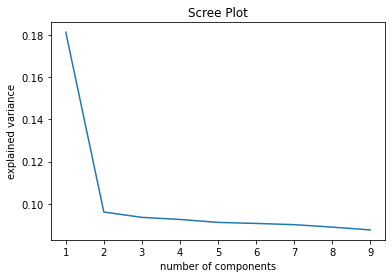

In [22]:
# Iterate through the length of the explained variance ratios in the PCA step of the pipeline and append each to list PC label
pc_labels = [str(pc_var+1) for pc_var in range(len(pipeline.steps[1][1].explained_variance_ratio_))]
# Iterate through the explained variance ratios in the PCA step of the pipeline and append each to list pc_values
pc_values = [pc_val for pc_val in pipeline.steps[1][1].explained_variance_ratio_]
# Create dataframe of pc_labels and pc_values
pc_df = pd.DataFrame({'pc_labels': pc_labels, 'pc_values': pc_values})

# Use seaborn lineplot to visualize the explained variance ratio from dataframe pc_df
sns.lineplot(data=pc_df, x=pc_labels, y=pc_values)

# Add title
plt.title('Scree Plot')
# Add x-axis title
plt.xlabel('number of components')
# Add y-axis title
plt.ylabel('explained variance')
# Show plot
plt.show()

#### Principle component explained variance

In [23]:
# Start counter for names of principle components
pc_counter = 1

# Print header
print('Principle Components Explained Variance Ratios\n'+'-'*50+'\n')

# Iterate through cumulative sum of explained variance ratio of PCA
for i in pipeline.steps[1][1].explained_variance_ratio_:
    # Print PC label and variance ratio
    print('PC {}: {:.4f}'.format(pc_counter, i))
    # Add to counter
    pc_counter += 1

Principle Components Explained Variance Ratios
--------------------------------------------------

PC 1: 0.1813
PC 2: 0.0961
PC 3: 0.0936
PC 4: 0.0926
PC 5: 0.0912
PC 6: 0.0907
PC 7: 0.0901
PC 8: 0.0890
PC 9: 0.0876


#### Principle component cumulative explained variance

In [24]:
# Start counter for names of principle components
pc_counter = 1

# Print header
print('Principle Components Cumulative Explained Variance Ratio\n'+'-'*50+'\n')

# Iterate through cumulative sum of explained variance ratio of PCA
for i in pipeline.steps[1][1].explained_variance_ratio_.cumsum():
    # Print PC label and variance ratio
    print('PC {}: {:.4f}'.format(pc_counter, i))
    # Add to counter
    pc_counter += 1

Principle Components Cumulative Explained Variance Ratio
--------------------------------------------------

PC 1: 0.1813
PC 2: 0.2774
PC 3: 0.3710
PC 4: 0.4636
PC 5: 0.5548
PC 6: 0.6455
PC 7: 0.7357
PC 8: 0.8246
PC 9: 0.9123


In [25]:
# Calculate total explained variance of the reduced 9 principal components of PCA
pca_total_var = pipeline.steps[1][1].explained_variance_ratio_.cumsum()[-1]
pca_len = len(pipeline.steps[1][1].explained_variance_ratio_.cumsum())
print('The total explained variance of the {} principal components is {:.2f}.'.format(pca_len, pca_total_var))

The total explained variance of the 9 principal components is 0.91.


In [26]:
print('Churn dataframe had {} features.'.format(len(churn_df.columns)))

Churn dataframe had 58 features.


In [27]:
churn_df.drop(churn_cont, axis=1, inplace=True)

In [28]:
churn_pc_df = pipeline.fit_transform(churn_cont)

for i in range(len(pca_df.columns)):
    churn_df['PC '+str(i+1)] = churn_pc_df[:,i]

In [29]:
print('Churn dataframe now has been reduced to {} features through PCA.'.format(len(churn_df.columns)))

Churn dataframe now has been reduced to 56 features through PCA.


# References

#### Principal Component Analysis

https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c

https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c

https://vitalflux.com/pca-explained-variance-concept-python-example/